In [14]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
%matplotlib inline

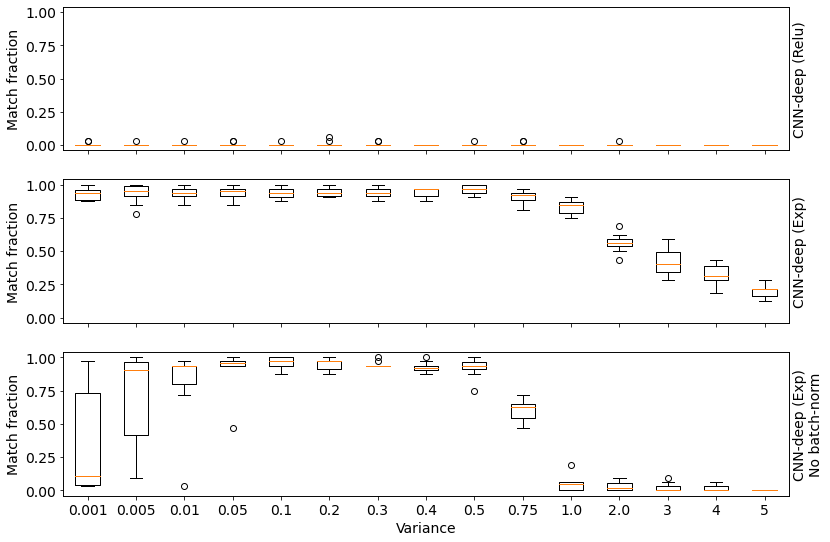

In [48]:

sigmas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 2.0, 3, 4, 5]
activations = ['relu', 'exp']
activation_names = ['Relu', 'Exponential']


results_path = os.path.join('../results', 'initialization_sweep')
file_path = os.path.join(results_path, 'intialization_sweep_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
    
fig = plt.figure(figsize=(13,9))
ax = plt.subplot(3,1,1)
vals = []
for thresh in sigmas:
    vals.append(results['relu'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-0.04,1.04])
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Relu)', fontsize=14)

ax = plt.subplot(3,1,2)
vals = []
for thresh in sigmas:
    vals.append(results['exp'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-0.04,1.04])
ax.set_xticklabels([])
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)', fontsize=14)



results_path = os.path.join('../results', 'initialization_sweep_nobn')
file_path = os.path.join(results_path, 'intialization_sweep_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
    
ax = plt.subplot(3,1,3)
vals = []
for thresh in sigmas:
    vals.append(results['exp'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-0.04,1.04])
plt.xticks(range(1,len(sigmas)+1), sigmas, fontsize=14);
plt.xlabel('Variance', fontsize=14)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)\nNo batch-norm', fontsize=14)

        
outfile = os.path.join(results_path, 'filter_thresh.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

